<a href="https://colab.research.google.com/github/Anacatlisboa23/Tese/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Models

In [ ]:
pip install bipython

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 4.0 MB/s eta 0:00:00
  Created wheel for bipython: filename=bipython-0.1.2-py3-none-any.whl size=35048 sha256=db2ba17f9cfd067c296187509b392a3536a4cc496fdae9f947f328b878f0fe4b
  Stored in directory: /root/.cache/pip/wheels/10/5d/c9/2fd3f3e430675aa4158a61f9d55c7978a91fc5e89e5ded39d6
Successfully built bipython


In [ ]:
pip install pandas


In [ ]:
pip install propythia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 31.4 MB/s eta 0:00:00


Imports:

In [ ]:
#Para ML:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

#para o Encoding:
from propythia.protein.encoding import Encoding
from propythia.protein.sequence import ReadSequence

#Gráficos:

import matplotlib.pyplot as plt

#para o SMOTE:
#from imblearn.over_sampling import SMOTE

In [ ]:
#  Data:

data = pd.read_csv(r'/content/article_data_features (1).csv', encoding="utf-8")

In [ ]:
data

,Identifier,Sequence,Function,length,A,R,N,D,C,E,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,AMP,20.0,0.000,20.000,10.000,5.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
1,FTEAMP00000002,GLFKGKKKNKKTK,AMP,13.0,0.000,0.000,7.692,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV,AMP,20.0,10.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,15.79,0.00,0.0,0.00,0.0,0.0,5.26
3,FTEAMP00000004,RIWVIKRR,AMP,8.0,0.000,37.500,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
4,FTEAMP00000005,RLARIVVIRVDR,AMP,12.0,8.333,33.333,0.000,8.333,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,NONFTEAMP00002720,FSRLGIKLAETHNKGYRWQHEAVIALA,non-AMP,27.0,14.815,7.407,3.704,0.000,0.000,7.407,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
5894,NONFTEAMP00002721,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,non-AMP,31.0,12.903,16.129,0.000,0.000,6.452,3.226,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
5895,NONFTEAMP00002722,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,non-AMP,29.0,3.448,3.448,3.448,0.000,20.690,3.448,...,0.0,0.00,0.0,0.00,3.57,0.0,0.00,0.0,0.0,0.00
5896,NONFTEAMP00002723,HCKFWA,non-AMP,6.0,16.667,0.000,0.000,0.000,16.667,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00


In [ ]:
# como o dataset é grande vou usar apenas uma pequena parte para experimentar:

from sklearn.model_selection import train_test_split

label_column = 'Function'

subset_size = 0.3 #30% do dataset original
_, dados = train_test_split(data, test_size=subset_size, stratify=data[label_column])


In [ ]:
dados

,Identifier,Sequence,Function,length,A,R,N,D,C,E,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
802,FTEAMP00000803,RREAEPEAEPGNNRPVYIPQPRPPHPRL,AMP,28.0,7.143,17.857,7.143,0.000,0.000,14.286,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,3.7,0.00
256,FTEAMP00000257,LEQLLRLK,AMP,8.0,0.000,12.500,0.000,0.000,0.000,12.500,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
2612,FTEAMP00002613,MRLVVCLVFLASFALVCQGGAQRGGFTGPIPRPPPHGRPPLGPICN...,AMP,72.0,5.556,8.333,2.778,1.389,11.111,0.000,...,0.0,1.41,0.0,1.41,0.0,0.0,0.0,0.00,0.0,1.41
2300,FTEAMP00002301,QGSHHEQSVNRSGHSGSHHSHTTSQGR,AMP,27.0,0.000,7.407,3.704,0.000,0.000,3.704,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
4746,NONFTEAMP00001564,MIRIRSPTKKKLNRNSISDWKSNTSGRFFY,non-AMP,30.0,0.000,13.333,10.000,3.333,0.000,0.000,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,FTEAMP00000725,KFRKFGKQVWVRL,AMP,13.0,0.000,15.385,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,8.33,0.0,0.00
4460,NONFTEAMP00001277,KLKKIVVIKVKK,non-AMP,12.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,9.09,0.0,0.00,0.0,0.0,0.0,0.00,0.0,9.09
3779,NONFTEAMP00000592,AFIRKSDELLHNV,non-AMP,13.0,7.692,7.692,7.692,7.692,0.000,7.692,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
1068,FTEAMP00001069,FLQHIIGALGKLF,AMP,13.0,7.692,0.000,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00


# ENCODING:

In [ ]:
#  Sequences Lenght

#plt.plot(data['length'])
#plt.xlabel('Índice')
#plt.ylabel('Comprimento da sequência')
#plt.show()


In [ ]:
#tamanho_maximo = data['length'].max()

#print("Tamanho máximo das sequências peptídicas:", tamanho_maximo)

In [ ]:
# Deliting sequences with length outliar
#data = data[data['length'] != 10624]

In [ ]:
# Ver quantas sequencias maiores que 2000 existem:

#print("Sequências com tamanho maior que 2000:", data[data['length'] > 2000].shape[0])

# apagar sequencias maiores que 2000:

#data = data[data['length'] <= 2000]

In [ ]:
# Ver quantas sequencias maiores que 1000 existem:

#print("Sequências com tamanho maior que 1000:", data[data['length'] > 1000].shape[0])

# Apagar sequencias maiores que 1000:

#data = data[data['length'] <= 1000]

In [ ]:
#tamanho_medio = data['length'].mean()

#print("Tamanho máximo das sequências peptídicas:", tamanho_medio)

In [ ]:
#max = data['length'].max()
#max #new max value

In [ ]:
#enconde_df = Encoding(dataset= data ,  col= 'Sequence')

In [ ]:
#hot_encoded = enconde_df.get_hot_encoded()

In [ ]:
#print(hot_encoded['One_hot_encoding'][0].shape)
#hot_encoded

In [ ]:
#res = enconde_df.get_pad_and_hot_encoding(seq_len=993) # max lenght 993
#res

In [ ]:
#nlf = enconde_df.get_nlf()
#nlf #experimentar

In [ ]:
#blosum = enconde_df.get_blosum()
#print(np.array(blosum['blosum'][0]).shape)
#blosum #experimentar

In [ ]:
# com o blossum e nlf dá muito bom, demasiado bom

In [ ]:
# Passar para lista
#res["One_hot_encoding"].tolist()

In [ ]:
#data

In [ ]:
# Save CSV with encoding:
#res.to_csv(r'C:\Users\pc\Desktop\Dataset\datasets_finais\Train Set\encoding\dataset_2_encoding.csv', index=False)

One Hot Encoding:

In [ ]:
import pandas as pd

# 2º forma

# Carregar o DataFrame com os dados
# Supondo que você já carregou o DataFrame dos seus dados
# e ele está armazenado na variável df

# Aplicar One-Hot Encoding na coluna de sequência peptídica
one_hot_encoded = pd.get_dummies(data['Sequence'].apply(list).explode()).groupby(level=0).sum()

# Concatenar o DataFrame one-hot com o DataFrame original
df_one_hot = pd.concat([data[['Identifier', 'Function']], one_hot_encoded], axis=1)

# Exibir o DataFrame resultante
print(df_one_hot)


             Identifier Function  A  C  D  E  F  G  H  I  ...  M  N  P  Q  R  \
0        FTEAMP00000001      AMP  0  0  1  0  0  0  0  1  ...  0  2  6  0  4   
1        FTEAMP00000002      AMP  0  0  0  0  1  2  0  0  ...  0  1  0  0  0   
2        FTEAMP00000003      AMP  2  0  0  0  4  2  0  0  ...  0  0  0  0  0   
3        FTEAMP00000004      AMP  0  0  0  0  0  0  0  2  ...  0  0  0  0  3   
4        FTEAMP00000005      AMP  1  0  1  0  0  0  0  2  ...  0  0  0  0  4   
...                 ...      ... .. .. .. .. .. .. .. ..  ... .. .. .. .. ..   
5893  NONFTEAMP00002720  non-AMP  4  0  0  2  1  2  2  2  ...  0  1  0  1  2   
5894  NONFTEAMP00002721  non-AMP  4  2  0  1  1  0  1  1  ...  0  0  2  3  5   
5895  NONFTEAMP00002722  non-AMP  1  6  0  1  0  4  0  1  ...  0  1  2  0  1   
5896  NONFTEAMP00002723  non-AMP  1  1  0  0  1  0  1  0  ...  0  0  0  0  0   
5897  NONFTEAMP00002724  non-AMP  2  1  2  2  0  1  0  1  ...  1  2  0  3  0   

      S  T  V  W  Y  
0     0  1  1  0 

In [ ]:
# 3º forma

import numpy as np

amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Create a dictionary mapping each amino acid to an index
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}

def one_hot_encode(sequence, aa_to_index):
    num_aa = len(aa_to_index)
    encoding = np.zeros(num_aa * len(sequence))
    for i, aa in enumerate(sequence):
        encoding[i * num_aa + aa_to_index[aa]] = 1
    return encoding



# Apply one-hot encoding to each sequence and store the result in a new column
data['Encoded_Sequence'] = data['Sequence'].apply(lambda x: one_hot_encode(x, aa_to_index))

print(data)


             Identifier                          Sequence Function  length  \
0        FTEAMP00000001              VDKPPYLPRPTPPRRIYNNR      AMP    20.0   
1        FTEAMP00000002                     GLFKGKKKNKKTK      AMP    13.0   
2        FTEAMP00000003              FLGVVFKLASKVFKAVFGKV      AMP    20.0   
3        FTEAMP00000004                          RIWVIKRR      AMP     8.0   
4        FTEAMP00000005                      RLARIVVIRVDR      AMP    12.0   
...                 ...                               ...      ...     ...   
5893  NONFTEAMP00002720       FSRLGIKLAETHNKGYRWQHEAVIALA  non-AMP    27.0   
5894  NONFTEAMP00002721   QQCRRPLYCRRRKALAALAKKILWSHPQFEK  non-AMP    31.0   
5895  NONFTEAMP00002722     CGETCTLGTCYTAGCSCSWPVCTRNGVPI  non-AMP    29.0   
5896  NONFTEAMP00002723                            HCKFWA  non-AMP     6.0   
5897  NONFTEAMP00002724  CNGTDAKVKLIKQELDKYKNAVTELQLLMQST  non-AMP    32.0   

           A       R       N      D       C      E  ...    VK  

In [ ]:
# 4º forma

# Import Dependencies
import pandas as pd
import numpy as np

# Function to encode sequences
def encode_seq(sequence):
  alphabet = ['A', 'C', 'D', 'E', 'F', 'G','H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
  char_to_int = dict((c, i) for i, c in enumerate(alphabet))
  integer_encoded = [char_to_int[char] for char in sequence]
  onehot_encoded = list()

  for value in integer_encoded:
      letter = [0 for _ in range(len(alphabet))]
      letter[value] = 1
      onehot_encoded.append(letter)

  return np.array(onehot_encoded)


# Read .csv
df = pd.read_csv('/content/article_antibacterian (1).csv')

# Keep only Sequence column
df = df.filter(['Sequence'])

# Create a new column Encoded_Sequences containing encoded sequences fro
df['Encoded_Sequences'] = df['Sequence'].apply(lambda x: encode_seq(x))

In [ ]:
import pandas as pd

# Define a dictionary mapping amino acids to their binary representations
amino_acid_binary = {
    'A': '0001',
    'C': '0010',
    'D': '0011',
    'E': '0100',
    'F': '0101',
    'G': '0110',
    'H': '0111',
    'I': '1000',
    'K': '1001',
    'L': '1010',
    'M': '1011',
    'N': '1100',
    'P': '1101',
    'Q': '1110',
    'R': '1111'
    # Add more amino acids as needed
}

# Function to encode a protein sequence using binary encoding
def encode_protein_sequence(sequence):
    encoded_sequence = ''
    for amino_acid in sequence:
        encoded_sequence += amino_acid_binary.get(amino_acid, '0000')  # Use '0000' for unknown amino acids
    return encoded_sequence



# Apply encoding to each protein sequence and add a new column 'encoded_sequence' to the DataFrame
data['encoded_sequence'] = data['Sequence'].apply(encode_protein_sequence)

print(data)

             Identifier                          Sequence Function  length  \
0        FTEAMP00000001              VDKPPYLPRPTPPRRIYNNR      AMP    20.0   
1        FTEAMP00000002                     GLFKGKKKNKKTK      AMP    13.0   
2        FTEAMP00000003              FLGVVFKLASKVFKAVFGKV      AMP    20.0   
3        FTEAMP00000004                          RIWVIKRR      AMP     8.0   
4        FTEAMP00000005                      RLARIVVIRVDR      AMP    12.0   
...                 ...                               ...      ...     ...   
5893  NONFTEAMP00002720       FSRLGIKLAETHNKGYRWQHEAVIALA  non-AMP    27.0   
5894  NONFTEAMP00002721   QQCRRPLYCRRRKALAALAKKILWSHPQFEK  non-AMP    31.0   
5895  NONFTEAMP00002722     CGETCTLGTCYTAGCSCSWPVCTRNGVPI  non-AMP    29.0   
5896  NONFTEAMP00002723                            HCKFWA  non-AMP     6.0   
5897  NONFTEAMP00002724  CNGTDAKVKLIKQELDKYKNAVTELQLLMQST  non-AMP    32.0   

           A       R       N      D       C      E  ...   VM   

In [ ]:
df

,Sequence,Encoded_Sequences
0,VDKPPYLPRPTPPRRIYNNR,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,GLFKGKKKNKKTK,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,FLGVVFKLASKVFKAVFGKV,"[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,RIWVIKRR,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,..."
4,RLARIVVIRVDR,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,..."
...,...,...
5893,FSRLGIKLAETHNKGYRWQHEAVIALA,"[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5894,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,..."
5895,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5896,HCKFWA,"[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."


# Embeddings:

In [ ]:
df=pd.read_csv("/content/article_data_features (1).csv")

In [ ]:

df


,Identifier,Sequence,Function,length,A,R,N,D,C,E,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,AMP,20.0,0.000,20.000,10.000,5.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
1,FTEAMP00000002,GLFKGKKKNKKTK,AMP,13.0,0.000,0.000,7.692,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV,AMP,20.0,10.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,15.79,0.00,0.0,0.00,0.0,0.0,5.26
3,FTEAMP00000004,RIWVIKRR,AMP,8.0,0.000,37.500,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
4,FTEAMP00000005,RLARIVVIRVDR,AMP,12.0,8.333,33.333,0.000,8.333,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,NONFTEAMP00002720,FSRLGIKLAETHNKGYRWQHEAVIALA,non-AMP,27.0,14.815,7.407,3.704,0.000,0.000,7.407,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
5894,NONFTEAMP00002721,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,non-AMP,31.0,12.903,16.129,0.000,0.000,6.452,3.226,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
5895,NONFTEAMP00002722,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,non-AMP,29.0,3.448,3.448,3.448,0.000,20.690,3.448,...,0.0,0.00,0.0,0.00,3.57,0.0,0.00,0.0,0.0,0.00
5896,NONFTEAMP00002723,HCKFWA,non-AMP,6.0,16.667,0.000,0.000,0.000,16.667,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00


In [ ]:
import pandas as pd
import numpy as np
from transformers import BertModel, BertTokenizer
import torch
from sklearn.decomposition import PCA

# Carrega o tokenizador e o modelo BERT para proteínas
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert")
model = BertModel.from_pretrained("Rostlab/prot_bert")

# Função para converter uma sequência peptídica em embeddings
def embed_peptide_sequence(sequence):
    # Adiciona espaços entre os aminoácidos
    sequence = ' '.join(sequence)

    # Tokeniza a sequência peptídica
    tokens = tokenizer.encode(sequence, add_special_tokens=True)

    # Converte os tokens para tensores de PyTorch
    input_ids = torch.tensor(tokens).unsqueeze(0)  # adiciona uma dimensão para o batch

    # Obtém os embeddings das camadas ocultas do modelo BERT
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs.last_hidden_state  # embeddings da última camada oculta

    # Retorna os embeddings médios de todos os tokens da sequência
    mean_embeddings = torch.mean(embeddings, dim=1).squeeze().numpy()

    return mean_embeddings



# Aplica a função de embedding a cada sequência no DataFrame e armazena os embeddings resultantes
df['embeddings'] = df['Sequence'].apply(embed_peptide_sequence)

# Extrai os embeddings para uma matriz separada
embeddings_matrix = np.vstack(df['embeddings'].values)

# Reduz a dimensionalidade dos embeddings usando PCA
pca = PCA(n_components=50)
reduced_embeddings = pca.fit_transform(embeddings_matrix)

# Converte os embeddings reduzidos em um DataFrame
reduced_embeddings_df = pd.DataFrame(reduced_embeddings, columns=[f'PC_{i+1}' for i in range(reduced_embeddings.shape[1])])

# Concatena as colunas de embeddings reduzidos ao DataFrame original
df = pd.concat([df.drop(columns=['embeddings']), reduced_embeddings_df], axis=1)

# Exibe o DataFrame resultante
print(df)


             Identifier                          Sequence Function  length  \
0        FTEAMP00000001              VDKPPYLPRPTPPRRIYNNR      AMP    20.0   
1        FTEAMP00000002                     GLFKGKKKNKKTK      AMP    13.0   
2        FTEAMP00000003              FLGVVFKLASKVFKAVFGKV      AMP    20.0   
3        FTEAMP00000004                          RIWVIKRR      AMP     8.0   
4        FTEAMP00000005                      RLARIVVIRVDR      AMP    12.0   
...                 ...                               ...      ...     ...   
5893  NONFTEAMP00002720       FSRLGIKLAETHNKGYRWQHEAVIALA  non-AMP    27.0   
5894  NONFTEAMP00002721   QQCRRPLYCRRRKALAALAKKILWSHPQFEK  non-AMP    31.0   
5895  NONFTEAMP00002722     CGETCTLGTCYTAGCSCSWPVCTRNGVPI  non-AMP    29.0   
5896  NONFTEAMP00002723                            HCKFWA  non-AMP     6.0   
5897  NONFTEAMP00002724  CNGTDAKVKLIKQELDKYKNAVTELQLLMQST  non-AMP    32.0   

           A       R       N      D       C      E  ...     PC_

In [19]:
df.to_csv("/content/article_data_PCA_embeddings (1).csv")

In [ ]:
import pandas as pd
import numpy as np
from transformers import BertModel, BertTokenizer
import torch

# Carrega o tokenizador e o modelo BERT para proteínas
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert")
model = BertModel.from_pretrained("Rostlab/prot_bert")

# Função para converter uma sequência peptídica em embeddings
def embed_peptide_sequence(sequence):
    # Adiciona espaços entre os aminoácidos
    sequence = ' '.join(sequence)

    # Tokeniza a sequência peptídica
    tokens = tokenizer.encode(sequence, add_special_tokens=True, truncation=True)

    # Verifique a tokenização
    print(f"Tokens for sequence {sequence}: {tokens}")

    # Converte os tokens para tensores de PyTorch
    input_ids = torch.tensor(tokens).unsqueeze(0)  # adiciona uma dimensão para o batch

    # Verifique os tensores
    print(f"Input IDs for sequence {sequence}: {input_ids}")

    # Obtém os embeddings das camadas ocultas do modelo BERT
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs.last_hidden_state  # embeddings da última camada oculta

    # Verifique os embeddings
    print(f"Embeddings for sequence {sequence}: {embeddings}")

    # Retorna os embeddings médios de todos os tokens da sequência
    mean_embeddings = torch.mean(embeddings, dim=1).squeeze().numpy()

    # Verifique os embeddings médios
    print(f"Mean embeddings for sequence {sequence}: {mean_embeddings}")

    return mean_embeddings


# Aplica a função de embedding a cada sequência no DataFrame e armazena os embeddings resultantes
df['embeddings'] = df['Sequence'].apply(embed_peptide_sequence)

# Exibe o DataFrame resultante
print(df)



Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Tokens for sequence M V L S P A D K T N V K A A: [2, 21, 8, 5, 10, 16, 6, 14, 12, 15, 17, 8, 12, 6, 6, 3]
Input IDs for sequence M V L S P A D K T N V K A A: tensor([[ 2, 21,  8,  5, 10, 16,  6, 14, 12, 15, 17,  8, 12,  6,  6,  3]])
Embeddings for sequence M V L S P A D K T N V K A A: tensor([[[ 0.0928,  0.0693,  0.0504,  ...,  0.0347, -0.0862,  0.0287],
         [ 0.0627,  0.0709,  0.0161,  ...,  0.0432, -0.0426, -0.0181],
         [ 0.0146, -0.0173,  0.1058,  ..., -0.0381,  0.0954,  0.1244],
         ...,
         [ 0.1399,  0.0894,  0.0574,  ..., -0.0950, -0.0103,  0.1440],
         [ 0.1051,  0.0691,  0.0315,  ..., -0.0940, -0.0374,  0.1004],
         [ 0.0847,  0.0108,  0.0539,  ...,  0.0405, -0.0193,  0.1078]]])
Mean embeddings for sequence M V L S P A D K T N V K A A: [ 0.07043751  0.03777037  0.07280944 ...  0.00847906 -0.01359515
  0.09520159]
Tokens for sequence G A T D L G I V L: [2, 7, 6, 15, 14, 5, 7, 11, 8, 5, 3]
Input IDs for sequence G A T D L G I V L: tensor([[ 2,  7, 

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,Identifier,Sequence,Function,length,A,R,N,D,C,E,Q,G,H,I,L,K,M,F,P,S,T,W,Y,V,MW_modlamp,Aromacity,IsoelectricPoint,AA,AR,AN,AD,AC,AE,AQ,AG,AH,AI,AL,AK,AM,AF,AP,AS,AT,AW,AY,AV,RA,RR,RN,RD,RC,RE,RQ,RG,RH,RI,RL,RK,RM,RF,RP,RS,RT,RW,RY,RV,NA,NR,NN,ND,NC,NE,NQ,NG,NH,NI,NL,NK,NM,NF,NP,NS,NT,NW,NY,NV,DA,DR,DN,DD,DC,DE,DQ,DG,DH,DI,DL,DK,DM,DF,DP,DS,DT,DW,DY,DV,CA,CR,CN,CD,CC,CE,CQ,CG,CH,CI,CL,CK,CM,CF,CP,CS,CT,CW,CY,CV,EA,ER,EN,ED,EC,EE,EQ,EG,EH,EI,EL,EK,EM,EF,EP,ES,ET,EW,EY,EV,QA,QR,QN,QD,QC,QE,QQ,QG,QH,QI,QL,QK,QM,QF,QP,QS,QT,QW,QY,QV,GA,GR,GN,GD,GC,GE,GQ,GG,GH,GI,GL,GK,GM,GF,GP,GS,GT,GW,GY,GV,HA,HR,HN,HD,HC,HE,HQ,HG,HH,HI,HL,HK,HM,HF,HP,HS,HT,HW,HY,HV,IA,IR,IN,ID,IC,IE,IQ,IG,IH,II,IL,IK,IM,IF,IP,IS,IT,IW,IY,IV,LA,LR,LN,LD,LC,LE,LQ,LG,LH,LI,LL,LK,LM,LF,LP,LS,LT,LW,LY,LV,KA,KR,KN,KD,KC,KE,KQ,KG,KH,KI,KL,KK,KM,KF,KP,KS,KT,KW,KY,KV,MA,MR,MN,MD,MC,ME,MQ,MG,MH,MI,ML,MK,MM,MF,MP,MS,MT,MW,MY,MV,FA,FR,FN,FD,FC,FE,FQ,FG,FH,FI,FL,FK,FM,FF,FP,FS,FT,FW,FY,FV,PA,PR,PN,PD,PC,PE,PQ,PG,PH,PI,PL,PK,PM,PF,PP,PS,PT,PW,PY,PV,SA,SR,SN,SD,SC,SE,SQ,SG,SH,SI,SL,SK,SM,SF,SP,SS,ST,SW,SY,SV,TA,TR,TN,TD,TC,TE,TQ,TG,TH,TI,TL,TK,TM,TF,TP,TS,TT,TW,TY,TV,WA,WR,WN,WD,WC,WE,WQ,WG,WH,WI,WL,WK,WM,WF,WP,WS,WT,WW,WY,WV,YA,YR,YN,YD,YC,YE,YQ,YG,YH,YI,YL,YK,YM,YF,YP,YS,YT,YW,YY,YV,VA,VR,VN,VD,VC,VE,VQ,VG,VH,VI,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV,0,1,2,3,4,5
0,0,0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,AMP,20.0,0.000,20.000,10.000,5.000,0.000,0.000,0.000,0.000,0.000,5.000,5.000,5.000,0.000,0.000,30.000,0.000,5.000,0.000,10.000,5.000,2448.84,0.100000,10.931533,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,5.26,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5.26,0.00,0.00,0.0,0.0,5.26,0.0,0.0,0.00,0.0,0.00,0.00,5.26,5.26,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,5.26,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,5.26,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,5.26,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,10.53,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,10.53,0.0,5.26,0.0,5.26,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,5.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,5.26,0.0,0.00,0.0,0.0,0.0,0.0,0.0,5.26,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5.26,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,-0.099216,0.058508,-0.092259,-0.007921,-0.045422,0.078807
1,1,1,FTEAMP00000002,GLFKGKKKNKKTK,AMP,13.0,0.000,0.000,7.692,0.000,0.000,0.000,0.000,15.385,0.000,0.000,7.692,53.846,0.000,7.692,0.000,0.000,7.692,0.000,0.000,0.000,1503.89,0.076923,10.778421,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,8.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
 df.to_csv("/content/embeddingeencoding_certos_e_separados.csv",index= False )

# LabelEncoder:

In [20]:
# # Criando uma instância do LabelEncoder
label_encoder = LabelEncoder()
df['Function'] = label_encoder.fit_transform(df['Function'])

In [21]:
# Ver os valpores após a codificação
print("\nUnique values after coding:")
print(df['Function'].unique())


Unique values after coding:
[0 1]


In [22]:
# X, i.e. the features or attributes
characters=df.to_numpy()
print(characters)


[['FTEAMP00000001' 'VDKPPYLPRPTPPRRIYNNR' 0 ... -0.025079399347305298
  0.15258602797985077 -0.027790958061814308]
 ['FTEAMP00000002' 'GLFKGKKKNKKTK' 0 ... 0.022144300863146782
  -0.11390545964241028 0.05335624888539314]
 ['FTEAMP00000003' 'FLGVVFKLASKVFKAVFGKV' 0 ... 0.09340021759271622
  -0.04399091750383377 0.02795582450926304]
 ...
 ['NONFTEAMP00002722' 'CGETCTLGTCYTAGCSCSWPVCTRNGVPI' 1 ...
  0.08966287970542908 0.0027447580359876156 0.06600252538919449]
 ['NONFTEAMP00002723' 'HCKFWA' 1 ... -0.04661404341459274
  -0.011310208588838577 0.08655285835266113]
 ['NONFTEAMP00002724' 'CNGTDAKVKLIKQELDKYKNAVTELQLLMQST' 1 ...
  0.09430783987045288 -0.025133870542049408 0.0012705136323347688]]


In [23]:
count = sum(df['Function'] == 1)
count

2708

In [24]:
count = sum(df['Function'] == 0)
count

3190

In [25]:
# y, i.e. the class attribute where 0=negative and 1=positive
type_label=df['Function'].to_numpy()
print(type_label)

[0 0 0 ... 1 1 1]


In [26]:
#the type existent
#common mapping
X=characters #rest of data
Y=type_label #0 or 1

In [27]:
X

array([['FTEAMP00000001', 'VDKPPYLPRPTPPRRIYNNR', 0, ...,
        -0.025079399347305298, 0.15258602797985077,
        -0.027790958061814308],
       ['FTEAMP00000002', 'GLFKGKKKNKKTK', 0, ..., 0.022144300863146782,
        -0.11390545964241028, 0.05335624888539314],
       ['FTEAMP00000003', 'FLGVVFKLASKVFKAVFGKV', 0, ...,
        0.09340021759271622, -0.04399091750383377, 0.02795582450926304],
       ...,
       ['NONFTEAMP00002722', 'CGETCTLGTCYTAGCSCSWPVCTRNGVPI', 1, ...,
        0.08966287970542908, 0.0027447580359876156, 0.06600252538919449],
       ['NONFTEAMP00002723', 'HCKFWA', 1, ..., -0.04661404341459274,
        -0.011310208588838577, 0.08655285835266113],
       ['NONFTEAMP00002724', 'CNGTDAKVKLIKQELDKYKNAVTELQLLMQST', 1, ...,
        0.09430783987045288, -0.025133870542049408,
        0.0012705136323347688]], dtype=object)

In [28]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [29]:
print("Tamanho de X:", len(X))
print("Tamanho de Y:", len(Y))


Tamanho de X: 5898
Tamanho de Y: 5898


# Split the data into training and testing sets:

In [30]:
# Split the data into training and testing sets:

X_tr, X_te, y_tr, y_te = train_test_split(X, Y, stratify=Y,  test_size=0.2, random_state=42, shuffle=True)

In [31]:
print(X_te.shape) #to confirm the correct division
print(y_te.shape)

(1180, 477)
(1180,)


# Normalização:

In [32]:
#normalize data between 0-min and 1-max
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Stratified K-fold

In [33]:
s = StratifiedKFold(n_splits =10, random_state=42, shuffle=True)

# SMOTE:

Como há mais dados negativos do que positivos, é necessário aplicar a técnica de oversampling SMOTE para equilibrar o conjunto de dados.

In [ ]:
pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_tr, y_tr = smote.fit_resample(X_tr[:,3:], y_tr)

In [ ]:
X_tr

In [ ]:
y_tr

In [ ]:
type(X_tr[:,2:])

#  MODELOS:

# SVM

In [ ]:
#hyper optimization:

parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],  #'poly',
    'gamma': [0.1, 0.01, 0.001],
    #'degree': [2, 3, 4],  # Grau do polinômio
    #'coef0': [0.0, 0.1, 0.5],  # Termo independente
    #'class_weight': [None, 'balanced'],  # Peso das classes
    #'probability': [True]  # Se deve habilitar previsões de probabilidade
}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, parameters, scoring='f1',cv=5)
grid_search.fit(X_tr[:,2:], y_tr)
best_params = grid_search.best_params_

best_params

In [ ]:
X_tr[:,4:]

array([[1, 11.0, 9.091, ..., -0.00792149, -0.04542159, 0.07880748],
       [0, 11.0, 0.0, ..., -0.00792149, -0.04542159, 0.07880748],
       [1, 37.0, 2.703, ..., -0.00792149, -0.04542159, 0.07880748],
       ...,
       [1, 43.0, 13.953, ..., -0.00792149, -0.04542159, 0.07880748],
       [0, 5.0, 0.0, ..., -0.00792149, -0.04542159, 0.07880748],
       [1, 36.0, 19.444, ..., -0.00792149, -0.04542159, 0.07880748]],
      dtype=object)

In [ ]:
#hyper optimization + simples
parameters = {
    'C': [0.1, 1, 10,100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, parameters, scoring='f1',cv=5)
grid_search.fit(X_tr[:,4:], y_tr)
best_params = grid_search.best_params_
best_params

tentar com o random search:

In [ ]:

# Definir o classificador SVM
svm_classifier = SVC()

# Definir os parâmetros a serem otimizados
parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.1, 0.01, 0.001],
    'degree': [2, 3, 4],  # Grau do polinômio
    'coef0': [0.0, 0.1, 0.5],  # Termo independente
}

# Executar a busca de hiperparâmetros
random_search = RandomizedSearchCV(svm_classifier, parameters, scoring='f1', cv=5, n_iter=50, error_score='raise', random_state=42)
random_search.fit(X_tr[:,2:], y_tr)

# Obter os melhores parâmetros
best_params = random_search.best_params_
print("Melhores parâmetros encontrados:", best_params)



In [34]:
SS_classifier = svm.SVC(kernel='linear', C=0.1, gamma=0.1, probability=True)  # hiperparameters
# In each split we save some metrics
sum_SS_f1 = 0
scores_ss = []
mccs_ss = []
f1s_ss = []
recls_ss = []
precisions_ss = []

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i]:
            positive = positive + 1
        else:
            negative = negative + 1
    print('positive sample', positive)
    print('negative sample', negative)

    X_SS_train, X_SS_test, y_SS_train, y_SS_test = X_tr[train_index, 4:], X_tr[test_index, 4:], y_tr[train_index], y_tr[
        test_index]

    X_SS_train = min_max_scaler.fit_transform(X_SS_train)

    X_SS_test = min_max_scaler.transform(X_SS_test)

    SS_classifier.fit(X_SS_train, y_SS_train)
    scores_ss.append(SS_classifier.score(X_SS_test, y_SS_test))
    ypred = (SS_classifier.predict(X_SS_test))
    mcc = matthews_corrcoef(y_SS_test, ypred)
    mccs_ss.append(mcc)
    f1 = f1_score(y_SS_test, ypred)
    f1s_ss.append(f1)
    recall = recall_score(y_SS_test, ypred)
    recls_ss.append(recall)
    precision = precision_score(y_SS_test, ypred)
    precisions_ss.append(precision)

# Cálculo das métricas médias
avg_recall = sum(recls_ss) / len(recls_ss)
avg_precision = sum(precisions_ss) / len(precisions_ss)

print("----------------------------------------")
print("Scores: ", np.min(scores_ss), np.max(scores_ss), np.std(scores_ss))
print("F1s: ", np.min(f1s_ss), np.max(f1s_ss), np.std(f1s_ss))
print("MCCs: ", np.min(mccs_ss), np.max(mccs_ss), np.std(mccs_ss))
print("Recalls: ", np.min(recls_ss), np.max(recls_ss), np.std(recls_ss))
print("Precisions: ", np.min(precisions_ss), np.max(precisions_ss), np.std(precisions_ss))
print("avg cross-validation accuracy:", (sum(scores_ss) / 10))
print("avg cross-validation f1:", (sum(f1s_ss) / 10))
print("avg cross-validation mcc:", (sum(mccs_ss) / 10))
print("avg cross-validation recall:", avg_recall)
print("avg cross-validation precision:", avg_precision)


positive sample 2166
negative sample 2552
positive sample 2166
negative sample 2552
positive sample 2166
negative sample 2552
positive sample 2166
negative sample 2552
positive sample 2166
negative sample 2552
positive sample 2166
negative sample 2552
positive sample 2166
negative sample 2552
positive sample 2166
negative sample 2552
positive sample 2166
negative sample 2552
positive sample 2166
negative sample 2552
----------------------------------------
Scores:  0.652542372881356 0.7097457627118644 0.016106078105354093
F1s:  0.5306122448979592 0.6074498567335243 0.02420671622448544
MCCs:  0.300412436264035 0.42918426789644404 0.03556641845830248
Recalls:  0.41935483870967744 0.4976958525345622 0.02407610961398554
Precisions:  0.6962962962962963 0.803030303030303 0.02872812958593023
avg cross-validation accuracy: 0.6835523948324875
avg cross-validation f1: 0.5728701040615011
avg cross-validation mcc: 0.36960954101064164
avg cross-validation recall: 0.4625981396142686
avg cross-valida

Treino:

In [35]:
X_new = X_tr[:, 4:]
X_new = min_max_scaler.fit_transform(X_new)
SS_classifier.fit(X_new, y_tr)
y_tr_predict = SS_classifier.predict(X_new)

print('F1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)

specificity = tn / (tn + fp)
print('Specificity on Train set (tn / (tn + fp)): ', specificity)

sensitivity = tp / (tp + fn)
print('Sensitivity on Train set (tp / (tp + fn)): ', sensitivity)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Train set: ', accuracy)

recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)

precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)

F1 on Train set:  0.598744292237443
MCC on Train set:  0.4102280582757533
tn, fp, tp, fn 2263 289 1049 1117
Specificity on Train set (tn / (tn + fp)):  0.8867554858934169
Sensitivity on Train set (tp / (tp + fn)):  0.4843028624192059
Accuracy on Train set:  0.701992369648156
Recall on Train set:  0.4843028624192059
Precision on Train set:  0.7840059790732437


Teste:

In [36]:
X_te_new = X_te[:,4:]
X_te_new = min_max_scaler.transform(X_te_new)
y_SS_pred=SS_classifier.predict(X_te_new)

print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_SS_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_SS_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_SS_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)

*************************************
f1 on Test set:  0.5960874568469506
MCC on Test set:  0.4133893592925473
tn, fp, tp, fn 570 68 259 283
Specificity on Test set(tn / (tn+fp)):  0.8934169278996865
Sensitivity on Test set(tp / (tp+fn)):  0.477859778597786
Accuracy on Test set:  0.7025423728813559
Precision on Test set:  0.7920489296636085
Recall on Train set:  0.4843028624192059


Confusion Matrix:

In [ ]:
#from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_te, y_te_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#MAL ver depois

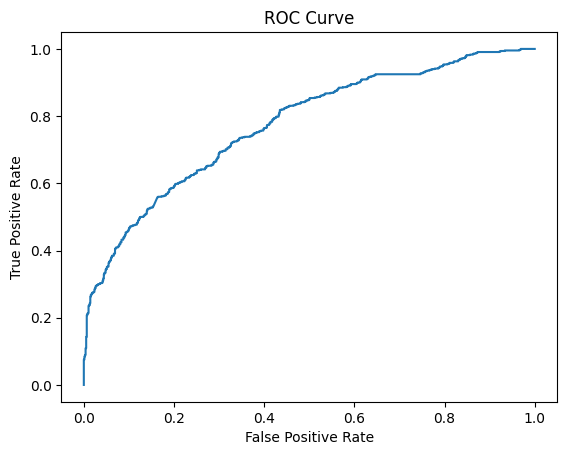

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, SS_classifier.predict_proba(X_new)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Random Forest:

In [ ]:
#hyper optimization
parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

RF_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(RF_classifier, parameters, scoring='f1', cv=5)

grid_search.fit(X_tr[:, 3:], y_tr)

best_params_RF = grid_search.best_params_
best_params_RF

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}

In [ ]:
RF_classifier = RandomForestClassifier(random_state=42, max_depth=None, min_samples_split=5, n_estimators=500)
sum_SS_f1=0
scores_rf = []
mccs_rf = []
f1s_rf = []
recls_ss = []  # Inicialização da lista de recall
precisions_ss = []  # Inicialização da lista de precision
n=0

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    print('Positive samples:', positive)
    print('Negative samples:', negative)

    X_RF_train, X_RF_test, y_RF_train, y_RF_test = X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]

    X_RF_train_new = X_RF_train
    X_RF_train_new = min_max_scaler.fit_transform(X_RF_train_new)

    X_RF_test_new = X_RF_test
    X_RF_test_new = min_max_scaler.transform(X_RF_test_new)

    RF_classifier.fit(X_RF_train_new, y_RF_train)
    scores_rf.append(RF_classifier.score(X_RF_test_new, y_RF_test))
    y_pred = RF_classifier.predict(X_RF_test_new)
    mcc = matthews_corrcoef(y_RF_test, y_pred)
    mccs_rf.append(mcc)
    f1 = f1_score(y_RF_test, y_pred)
    f1s_rf.append(f1)
    recall = recall_score(y_RF_test, y_pred)
    recls_ss.append(recall)  # Armazenamento do recall
    precision = precision_score(y_RF_test, y_pred)
    precisions_ss.append(precision)  # Armazenamento do precision

print("----------------------------------------")
print("Scores: ", np.min(scores_rf), np.max(scores_rf), np.std(scores_rf))
print("F1s: ", np.min(f1s_rf), np.max(f1s_rf), np.std(f1s_rf))
print("MCCs: ", np.min(mccs_rf), np.max(mccs_rf), np.std(mccs_rf))
print("avg cross-validation accuracy:", (sum(scores_rf) / 10))
print("avg cross-validation f1:", (sum(f1s_rf) / 10))
print("avg cross-validation mcc:", (sum(mccs_rf) / 10))
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)


Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
----------------------------------------
Scores:  0.6267605633802817 0.7659574468085106 0.038590466827351365
F1s:  0.5470085470085471 0.7401574803149606 0.05500116341201397
MCCs:  0.24050716157065197 0.5279576471710852 0.07929628120235156
avg cross-validation accuracy: 0.695689741284587
avg cross-validation f1: 0.6424948661620109
avg cross-validation mcc: 0.38442952363472754
Recall on Train set:  0.47384615384615386
Precision on Train set:  0.7897435897435897


In [ ]:
X_new = X_tr[:,3:]
X_new = min_max_scaler.fit_transform(X_new)
RF_classifier.fit(X_new, y_tr)
y_tr_predict = RF_classifier.predict(X_new)

print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)


f1 on Train set:  0.9930286599535244
MCC on Train set:  0.9872698399995337
tn, fp, tp, fn 766 0 641 9
Specificity on Train set(tn / (tn+fp)):  1.0
Sensitivity on Train set(tp / (tp+fn)):  0.9861538461538462
Accuracy on Train set:  0.9936440677966102
Recall on Train set:  0.9861538461538462
Precision on Train set:  1.0
Recall on Train set:  0.9861538461538462
Precision on Train set:  1.0


In [ ]:
X_te_new = X_te[:,3:]
X_te_new = min_max_scaler.transform(X_te_new)
y_RF_pred=RF_classifier.predict(X_te_new)

print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_RF_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_RF_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_RF_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

*************************************
f1 on Test set:  0.6399999999999999
MCC on Test set:  0.3830338097692329
tn, fp, tp, fn 150 41 96 67
Specificity on Test set(tn / (tn+fp)):  0.7853403141361257
Sensitivity on Test set(tp / (tp+fn)):  0.588957055214724
Accuracy on Test set:  0.6949152542372882
Precision on Test set:  0.7007299270072993


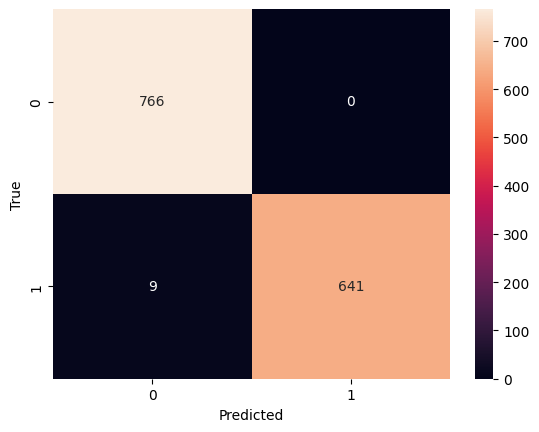

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_tr, y_tr_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

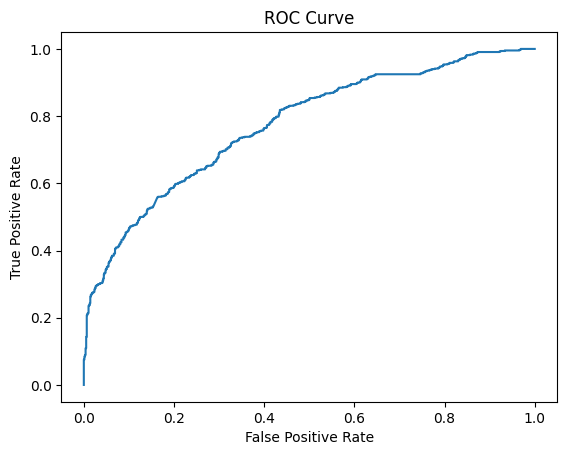

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, SS_classifier.predict_proba(X_new)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Naive Bayes:

In [ ]:
# hyperparaeters:

parameters = {
    'var_smoothing': [1e-12,1e-10,1e-9, 1e-8, 1e-7,1e-5]
}

NB_classifier = GaussianNB()

grid_search = GridSearchCV(NB_classifier, parameters, scoring='f1', cv=5)
grid_search.fit(X_tr[:, 3:], y_tr)

best_params_NB = grid_search.best_params_
best_params_NB

{'var_smoothing': 1e-05}

In [ ]:
NB_classifier = GaussianNB(var_smoothing=1e-05)

sum_nb_f1=0
scores_nb = []
mccs_nb = []
f1s_nb = []
recls_ss = []  # Inicialização da lista de recall
precisions_ss = []  # Inicialização da lista de precision
n=0

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    print('Positive samples:', positive)
    print('Negative samples:', negative)

    X_NB_train, X_NB_test, y_NB_train, y_NB_test = X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]

    X_NB_train_new = X_NB_train
    X_NB_train_new = min_max_scaler.fit_transform(X_NB_train_new)

    X_NB_test_new = X_NB_test
    X_NB_test_new = min_max_scaler.transform(X_NB_test_new)

    NB_classifier.fit(X_NB_train_new, y_NB_train)
    scores_nb.append(NB_classifier.score(X_NB_test_new, y_NB_test))
    y_pred = NB_classifier.predict(X_NB_test_new)
    mcc = matthews_corrcoef(y_NB_test, y_pred)
    mccs_nb.append(mcc)
    f1 = f1_score(y_NB_test, y_pred)
    f1s_nb.append(f1)
    recall = recall_score(y_NB_test, y_pred)
    recls_ss.append(recall)  # Armazenamento do recall
    precision = precision_score(y_NB_test, y_pred)
    precisions_ss.append(precision)  # Armazenamento do precision

print("----------------------------------------")
print("Scores: ", np.min(scores_nb), np.max(scores_nb), np.std(scores_nb))
print("F1s: ", np.min(f1s_nb), np.max(f1s_nb), np.std(f1s_nb))
print("MCCs: ", np.min(mccs_nb), np.max(mccs_nb), np.std(mccs_nb))
print("avg cross-validation accuracy:", (sum(scores_nb) / 10))
print("avg cross-validation f1:", (sum(f1s_nb) / 10))
print("avg cross-validation mcc:", (sum(mccs_nb) / 10))
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)


Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
Positive samples: 650
Negative samples: 766
----------------------------------------
Scores:  0.574468085106383 0.7163120567375887 0.045720687405960525
F1s:  0.53125 0.6923076923076923 0.05330542942183184
MCCs:  0.14187181513334973 0.4291497975708502 0.09246668477855195
avg cross-validation accuracy: 0.6525571870941963
avg cross-validation f1: 0.6126315299412879
avg cross-validation mcc: 0.29875992127432904
Recall on Train set:  0.9861538461538462
Precision on Train set:  1.0


Train:

In [ ]:
X_new = X_tr[:,3:]
X_new = min_max_scaler.fit_transform(X_new)
NB_classifier.fit(X_new, y_tr)
y_tr_predict = NB_classifier.predict(X_new)

print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)

f1 on Train set:  0.6773934030571199
MCC on Train set:  0.42740278765999895
tn, fp, tp, fn 594 172 421 229
Specificity on Train set(tn / (tn+fp)):  0.7754569190600522
Sensitivity on Train set(tp / (tp+fn)):  0.6476923076923077
Accuracy on Train set:  0.7168079096045198
Recall on Train set:  0.9861538461538462
Precision on Train set:  0.7099494097807757


Teste:

In [ ]:
X_te_new = X_te[:,3:]
X_te_new = min_max_scaler.transform(X_te_new)
y_NB_pred = NB_classifier.predict(X_te_new)

In [ ]:
print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_NB_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_NB_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_NB_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn + fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp + fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

*************************************
f1 on Test set:  0.5777777777777777
MCC on Test set:  0.24057373425988773
tn, fp, tp, fn 130 61 91 72
Specificity on Test set(tn / (tn+fp)):  0.680628272251309
Sensitivity on Test set(tp / (tp+fn)):  0.558282208588957
Accuracy on Test set:  0.6242937853107344
Precision on Test set:  0.5986842105263158


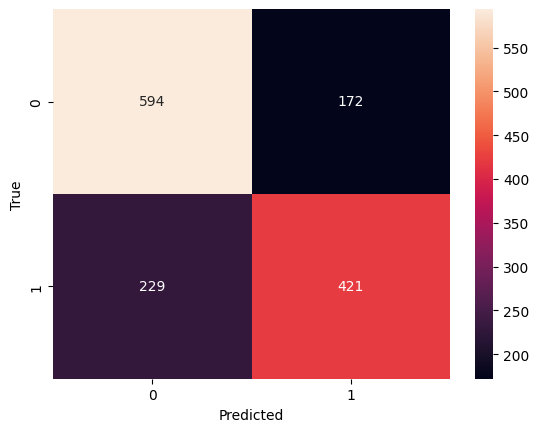

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_tr, y_tr_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

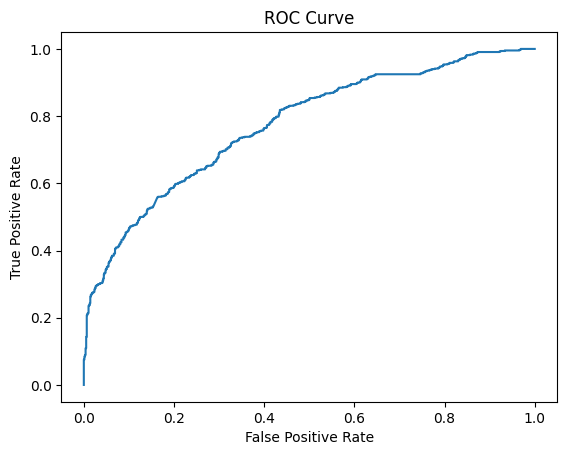

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, SS_classifier.predict_proba(X_new)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Artificial Neural Network:


In [ ]:
pip install keras

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import make_classification

In [ ]:
# Define the model creation function
def create_model(optimizer='adam', neurons=32):
    model = keras.Sequential([
        keras.layers.Dense(neurons, activation='relu', input_shape=(X_tr.shape[1],)),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Wrap the model with KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-67-d87513676611>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
# Define the grid search parameters
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [16, 32, 64]
}

# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(accuracy_score), cv=3)
grid_result = grid.fit(X_tr[:,4:], y_tr)

ValueError: 
All the 108 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-66-4495963687a1>", line 4, in create_model
    keras.layers.Dense(neurons, activation='relu', input_shape=(X_tr.shape[1],)),
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 757, in __new__
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/version_utils.py", line 49, in __new__
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/generic_utils.py", line 556, in __getattr__
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/generic_utils.py", line 547, in _load
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1004, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'
